In [1]:
#Setup
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
d = stats.norm.rvs(loc = 5., scale = 0.01, size = 100000)

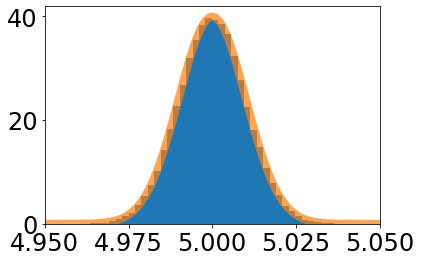

In [3]:
#Setup sample graph
fig, ax = plt.subplots(1, 1)
ax.hist(d,50, density=True)
plt.tick_params(labelsize = 24)
plt.xlim([4.95,5.05])
x = np.linspace(4.95,5.05,1000)
ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

In [195]:

#part 1b
values = [0.4,1,2,3,4]
cdf = stats.norm.cdf(values)
cdf
#checking with the z-table in wikipedia and these values look right

array([0.65542174, 0.84134475, 0.97724987, 0.9986501 , 0.99996833])

In [36]:
cdf

array([0.65542174, 0.84134475, 0.97724987, 0.9986501 , 0.99996833])

In [37]:
inverse = stats.norm.ppf(cdf)
inverse


array([0.4, 1. , 2. , 3. , 4. ])

In [29]:
#part 1d
stats.norm.ppf(0)

-inf

In [30]:
stats.norm.ppf(-1)

nan

In [31]:
stats.norm.ppf(1)

inf

In [32]:
stats.norm.ppf(0.5)

0.0

In [196]:
#The ppf uses a standard normal cdf. This means that a z-score of 0.5 corresponds with a mean of 0.
#Anything less than that will be negative.
stats.norm.ppf(0.001,loc=3,scale=1)
#How will we deal with it?
#Since in our case the sigma is just a measure of probability, 
#we will just take the absolute value of the ppf.
#The justification for this is since we are using a standard normal distribution,
#centered around 0, the percentage of each z value is the same as its negative:
stats.norm.pdf(-0.4,loc=0,scale=1)
#stats.norm.pdf(0.4,loc=0,scale=1)
#the 2 give the same value.

0.36827014030332333

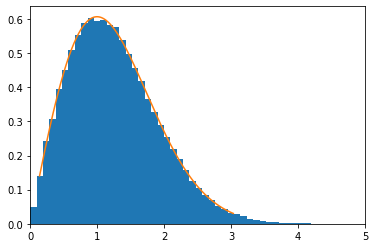

array([ 1.15231947,  1.1523528 ,  1.15238614, ..., 20.79674318,
       20.79734486, 20.79794656])

In [197]:
#part 2 - rayleigh
fig, ax = plt.subplots(1, 1)
plt.xlim([0,5])
x = np.linspace(scipy.stats.rayleigh.ppf(0.01), scipy.stats.rayleigh.ppf(0.99),100000)
y = x
y = np.exp(y)
d = stats.rayleigh.rvs(loc = 0, scale = 1, size = 100000)
ax.hist(d,50, density=True)
ax.plot(x, scipy.stats.rayleigh.pdf(x,loc=0,scale=1))
plt.show()
np.exp(x)

In [122]:
#part 3

In [ ]:
#a) hypothetical measurement: 3
#b) Statistical question: What is the probability that signal-free data following the Rayleigh distribution
#above will give a value greater than 3?
#c) Mathematical integral: Integrate from 3 to infinity the Rayleigh pdf, where sigma = 1


In [139]:
#probability that the background produced the signal
p = 1 - scipy.stats.rayleigh.cdf(3,loc=0,scale=1)
p

0.011108996538242266

In [143]:
#probability in sigmas
p = scipy.stats.rayleigh.cdf(3,loc=0,scale=1)
scipy.stats.rayleigh.ppf(p)

3.0000000000000013

In [141]:
#part 4 - exploring different values
#what if we used the most likely value
p = 1 - scipy.stats.rayleigh.cdf(1,loc=0,scale=1)
p

0.6065306597126334

In [144]:
#equivalent in sigmas
p = scipy.stats.rayleigh.cdf(1,loc=0,scale=1)
scipy.stats.rayleigh.ppf(p)

1.0

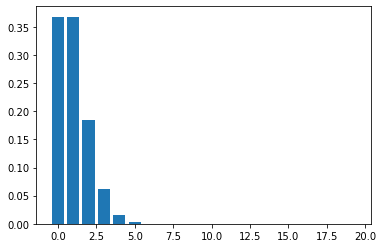

In [182]:
#Non-continuous distributions : Poisson
fig, ax = plt.subplots(1, 1)
x = np.arange(0, 20,1)
ax.bar(x, stats.poisson.pmf(x, 1),  label='poisson pmf')
#ax.vlines(x, 0, stats.poisson.rvs(x, 5), colors='r', lw=5, alpha=0.5)
plt.show()

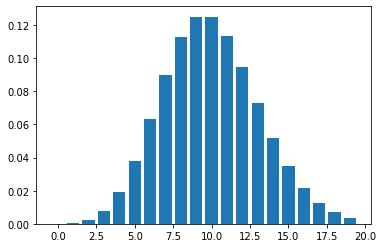

In [183]:
fig, ax = plt.subplots(1, 1)
x = np.arange(0, 20,1)
ax.bar(x, stats.poisson.pmf(x, 10),  label='poisson pmf')
#ax.vlines(x, 0, stats.poisson.rvs(x, 5), colors='r', lw=5, alpha=0.5)
plt.show()

In [184]:
#Part 1B: The poisson distribution looks somewhat like a normal distribution 
#with a mean around its parameter mu

In [190]:
#Part 1C: Assuming some event (e.g. number of phone calls received a day) follows a Poisson distribution
#and I receive 3 calls a day, what is the probability of receiving 5 calls in one day?
stats.poisson.pmf(5,3)

0.10081881344492458

In [191]:
#Part 1D: The sigmas will have to be rounded to the nearest corresponding x.
#e.g. if a sigma of 1 corresponds to x=1 and sigma 2 = x=3, then sigma 1.5 corresponds to x=2.

In [192]:
#Part 1E: The average rate of the event occuring in a given interval doesn't change.
#If an event occurs 3x in 1 hour, the Poisson distribution for events within a 30 min
#interval is 1.5. That is why the results are discrete but the parameter isn't necessarily.